# Segmenting Customers for Better Marketing  

## What is RFM Segmentation?
RFM segmentation is a data-driven approach to categorize customers based on their purchasing behavior. It focuses on three key metrics:

- Recency (R):

Measures the time since a customer's last purchase.
A lower recency value indicates a more engaged customer who has purchased recently.
Example: Customers who made a purchase last week are more likely to respond to marketing efforts than those who haven't bought anything in a year.
- Frequency (F):

Counts how often a customer has made purchases during a given period.
Higher frequency indicates a more loyal and engaged customer.
Example: Customers who purchase weekly are more valuable than those who buy only once a year.
- Monetary (M):

Represents the total amount of money a customer has spent.
Higher monetary values indicate customers who contribute significantly to revenue.

RFM segmentation helps businesses tailor their strategies to meet the specific needs of different customer groups. By understanding customer behavior through RFM segmentation, businesses can create targeted campaigns tailored to different customer segments, such as offering exclusive discounts to high-value customers or re-engagement emails to inactive ones. This approach enhances customer retention by identifying customers at risk of churn and implementing personalized win-back campaigns. It also helps maximize revenue by focusing on segments that generate the most value, like "Champions," and designing upselling or cross-selling strategies. Additionally, businesses can allocate resources efficiently by prioritizing segments with the highest ROI, while rewarding loyal customers and nurturing potential ones with incentives like loyalty points, VIP access, or personalized offers. Furthermore, RFM segmentation uncovers growth opportunities in segments like "Potential Loyalists" and "Promising," enabling businesses to convert them into loyal or high-value customers and drive sustainable growth.

Champions are high-value customers who significantly contribute to revenue. Retaining and delighting them through exclusive rewards, personalized experiences, and loyalty programs ensures long-term profitability. At Risk customers show signs of disengagement and are at a high risk of churn. Businesses should focus on identifying and re-engaging them with personalized win-back campaigns, reminders, or special offers to maintain revenue. Hibernating customers are disengaged and inactive, requiring low-cost campaigns, such as seasonal promotions or "we miss you" emails, to reignite their interest. New Customers are in the early stages of their journey and can be nurtured with effective onboarding, personalized product recommendations, and incentives to encourage repeat purchases and build loyalty.

## Business Problem

A UK-based online retailer specializing in unique, all-occasion giftware seeks to enhance its marketing effectiveness by segmenting its customer base. The dataset contains two years of transactional data (01/12/2010 - 09/12/2011) and features predominantly corporate customers, such as wholesalers. The company aims to use Recency (time since the last purchase) and Frequency (number of purchases) metrics to identify meaningful customer segments and develop tailored marketing strategies.

Our objective is to group customers by their purchase behavior (e.g., frequent, recent, or dormant buyers).  

### Dataset Overview:

- **Source:** [UCI Online Retail II Dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii)  
- **Data Size:** 541910 transactions  
- **Key Features:**  
- **CustomerID:** Unique customer number  
- **InvoiceDate:** Date of purchase  
- **Quantity:** Number of items bought  
- **Price:** Price per item (£)  
- **Description:** Description of the purchased item.
- **Country:** Country where the customer is located

## Data Analysis

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
import os
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Define and set the project root directory as the current working directory
project_root = Path().resolve().parent
os.chdir(project_root)

In the dataset provided, the Invoice column represents unique invoice numbers, while other columns like StockCode and Description represent the individual products within each invoice. It's important to note that a single invoice can contain multiple products. This is why there are multiple rows with the same Invoice number but different details for StockCode, Description, Quantity, and Price.

In [2]:
# Define the data directory and file name
data_directory = Path("D:/Veri/CRM")
file_name = "online_retail_II.xlsx"
file_path = data_directory / file_name

# Read the Excel file
if file_path.exists():
    df_original = pd.read_excel(file_path, sheet_name="Year 2010-2011")
    print("Data successfully loaded!")
    display(df_original.head())
else:
    print(f"File not found: {file_path}")

Data successfully loaded!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


Save the original version of the data set for back-up purposes.

In [3]:
df = df_original.copy(True)
df.shape

(541910, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- There are  135080 rows without a valid customer id but we cannot segment customers if we donot know them. So, we need to drop null values of this column.

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

- Number of unique products sold.

In [6]:
df.StockCode.nunique()

4070

- Top ten products sold:

In [7]:
df[df["Quantity"] > 0].groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)

StockCode
23843     80995
23166     78033
22197     56921
84077     55047
85099B    48478
85123A    41664
84879     36461
21212     36419
23084     31722
22492     26633
Name: Quantity, dtype: int64

- Number of unique invoices:

In [8]:
df["Invoice"].nunique()

25900

- Total Price per Invoice:

In [9]:
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.groupby("Invoice")["TotalPrice"].sum()

Invoice
536365        139.120
536366         22.200
536367        278.730
536368         70.050
536369         17.850
              ...    
C581484   -168469.600
C581490       -32.530
C581499      -224.690
C581568       -54.750
C581569        -7.500
Name: TotalPrice, Length: 25900, dtype: float64

- There are products with negative prices, which seems unreal.

In [10]:
df[df["Price"] < 0] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.060,NaN,United Kingdom,-11062.060
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.060,NaN,United Kingdom,-11062.060


This chart illustrates the revenue trends over time, highlighting periods of growth and decline. The sharp increase in late 2011 suggests successful engagement with high-value customers or seasonal demand. However, the drop at the end of the timeline requires further investigation to determine if it's due to incomplete data or a seasonal effect.

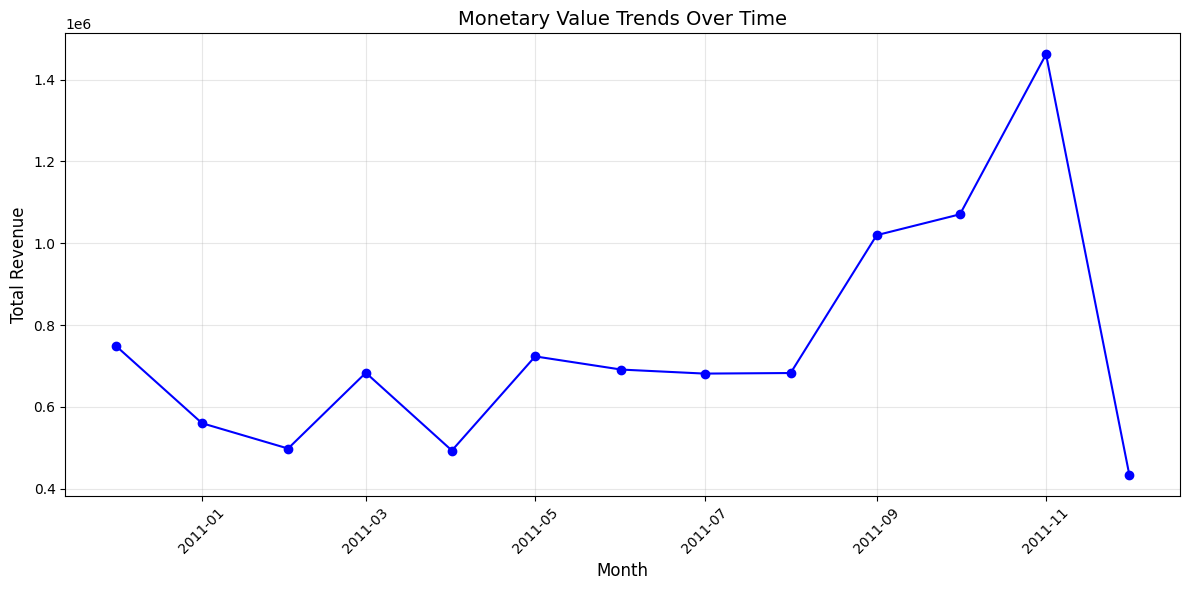

In [11]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate revenue by month
revenue_trends = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().reset_index()
revenue_trends['InvoiceDate'] = revenue_trends['InvoiceDate'].dt.to_timestamp()  # Convert Period to Timestamp for plotting

# Plot the revenue trends
plt.figure(figsize=(12, 6))
plt.plot(revenue_trends['InvoiceDate'], revenue_trends['TotalPrice'], marker='o', linestyle='-', color='blue')
plt.title("Monetary Value Trends Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ## Data Preprocessing

- Drop missing customers.

In [12]:
df = df[df["Customer ID"].notna()]
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

- The negatively priced products dropped too!

In [13]:
df[df["Price"] < 0] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice


- Upon dropping missing customers, dataframe is shrinked a little.

In [14]:
df.shape

(406830, 9)

There are negative values in the dataset due to returned products whose invoices starts with "C".

In [15]:
returns_mask = df["Invoice"].str.contains("C", na=False)
df_returns = df[returns_mask]
df = df[~returns_mask] # original purchases
df_returns.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.000,United Kingdom,-27.500
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.000,United Kingdom,-4.650
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.000,United Kingdom,-19.800
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom,-6.960
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom,-6.960


We need to deduct returns from their corresponding purchase invoices to calculate the net sales.

In [16]:
# Ensure purchases and returns are filtered properly
df_purchases = df[df["Quantity"] > 0]
df_returns = df[df["Quantity"] < 0]

# Merge returns with original purchases based on 'Customer ID' and 'StockCode'
merged_df = pd.merge(
    df_purchases,
    df_returns,
    on=["Customer ID", "StockCode"],
    suffixes=("_purchase", "_return"),
    how="left"
)

# Replace NaN values in return-related columns with 0
merged_df["Quantity_return"] = merged_df["Quantity_return"].fillna(0)
merged_df["Price_return"] = merged_df["Price_return"].fillna(0)

# Calculate net sales (adjusted quantity and total price)
merged_df["NetQuantity"] = merged_df["Quantity_purchase"] + merged_df["Quantity_return"]
merged_df["NetTotalPrice"] = merged_df["NetQuantity"] * merged_df["Price_purchase"]

# Display the first few rows
merged_df.head()


,Invoice_purchase,StockCode,Description_purchase,Quantity_purchase,InvoiceDate_purchase,Price_purchase,Customer ID,Country_purchase,TotalPrice_purchase,Invoice_return,Description_return,Quantity_return,InvoiceDate_return,Price_return,Country_return,TotalPrice_return,NetQuantity,NetTotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,NaN,NaN,0.000,NaT,0.000,NaN,NaN,6.000,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,NaN,NaN,0.000,NaT,0.000,NaN,NaN,6.000,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,NaN,NaN,0.000,NaT,0.000,NaN,NaN,8.000,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,NaN,NaN,0.000,NaT,0.000,NaN,NaN,6.000,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,NaN,NaN,0.000,NaT,0.000,NaN,NaN,6.000,20.340


In [17]:
merged_df.shape

(397925, 18)

In [18]:
df_adjusted = merged_df[['Invoice_purchase', 'StockCode', 'Description_purchase',  'NetQuantity', 'InvoiceDate_purchase',  'Price_purchase',
       'Customer ID', 'Country_purchase',  'NetTotalPrice']]
# Remove '_purchase' from column names
df_adjusted.columns = df_adjusted.columns.str.replace('_purchase', '', regex=False)

# Display the updated DataFrame
df_adjusted.head()


,Invoice,StockCode,Description,NetQuantity,InvoiceDate,Price,Customer ID,Country,NetTotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.000,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [19]:
# Get today's date as a datetime object
date = datetime.today()
print(date)
# Group by "Customer ID" and perform the aggregation
rfm = df_adjusted.groupby("Customer ID").aggregate({
    "InvoiceDate": lambda dates: (date - dates.max()).days,  # Days since last purchase
    "Invoice": "nunique",  # Number of unique invoices
    "NetTotalPrice": "sum"  # Total spending
}).reset_index()

# Rename columns for better clarity (optional)
rfm.rename(columns={
    "InvoiceDate": "Recency",
    "Invoice": "Frequency",
    "NetTotalPrice": "Monetary"
}, inplace=True)

# Display the resulting summary
display(rfm.head())


2025-01-20 01:22:03.398255


,Customer ID,Recency,Frequency,Monetary
0,12346.000,5115,1,77183.600
1,12347.000,4792,7,4310.000
2,12348.000,4865,4,1797.240
3,12349.000,4808,1,1757.550
4,12350.000,5100,1,334.400


In [20]:
rfm.describe()

,Customer ID,Recency,Frequency,Monetary
count,4339.000,4339.000,4339.000,4339.000
mean,15299.937,4882.041,4.272,2053.797
std,1721.890,100.008,7.705,8988.248
min,12346.000,4790.000,1.000,0.000
25%,13812.500,4807.000,1.000,307.245
50%,15299.000,4840.000,2.000,674.450
75%,16778.500,4931.500,5.000,1661.640
max,18287.000,5163.000,210.000,280206.020


In [21]:
rfm.shape

(4339, 4)

## Calculating RFM Scores

Divide Recency, Frequency and Monetary columns into 5 quantile-based bins and assign a score betwee 1 and 5 to each bin where 5 represents the most recent (lowest recency), the least frequent and also with the highest monetary value. Later on we will use the scores assigned to rank customers based on their RF values. The RF composite value is created by combining Recency and Frequency scores into a single string.

In [23]:
quantile_labels = [5, 4, 3, 2, 1]

rfm.loc[:, "RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels=quantile_labels)

rfm = rfm.copy()  # Ensure it is a standalone copy

# Assign MonetaryScore with explicit casting to category dtype
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"], 5, labels=quantile_labels).astype("category")

# Assign FrequencyScore with explicit casting to category dtype
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=quantile_labels).astype("category")

rfm["RF_Score"] = rfm["RecencyScore"].astype(str) +  rfm["FrequencyScore"].astype(str)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,RF_Score
0,12346.000,5115,1,77183.600,1,1,5,15
1,12347.000,4792,7,4310.000,5,1,1,51
2,12348.000,4865,4,1797.240,2,2,2,22
3,12349.000,4808,1,1757.550,4,2,5,45
4,12350.000,5100,1,334.400,1,4,5,15


## Creating RFM Segments

In this section, we assign each customer to a specific segment based on their RFM scores (RF_Score). The segmentation is done using the following logic.
Based on their RF_Score, customers are categorized into segments:

    - Champions: Highly engaged and frequent customers (e.g., RF_Score = 55).
    - Loyal Customers: Regular and valuable customers (RF_Score = 44, 45, etc.).
    - At Risk: Previously active customers who are now less engaged (RF_Score = 23, 24).
    - Hibernating: Least engaged customers who haven't purchased in a while (RF_Score = 11, 22).
    - New Customers: Recently acquired customers (RF_Score = 51).
    - Potential Loyalists: Customers who have purchased recently and show moderate frequency.
    - Promising: Customers who have purchased very recently but infrequently.
    - About to Sleep: Customers have recently disengaged and were infrequent buyers before disengaging.
    - Needs Attention: Average customers who fall into a neutral zone where they are not highly engaged but also not completely inactive.

In [24]:
segment_map = {
    r"[1-2][1-2]": "hibernating",
    r"[1-2][3-4]": "at risk",
    r"[1-2]5": "cannot loose",
    r"3[1-2]": "about to sleep",
    r"33": "needs attention",
    r"[3-4][4-5]": "loyal customers",
    r"41": "promising",
    r"51": "new customers",
    r"[4-5][2-3]": "potential loyalists",
    r"5[4-5]": "champions"
}

rfm["Segment"] = rfm["RF_Score"].replace(segment_map, regex=True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,RF_Score,Segment
0,12346.000,5115,1,77183.600,1,1,5,15,cannot loose
1,12347.000,4792,7,4310.000,5,1,1,51,new customers
2,12348.000,4865,4,1797.240,2,2,2,22,hibernating
3,12349.000,4808,1,1757.550,4,2,5,45,loyal customers
4,12350.000,5100,1,334.400,1,4,5,15,cannot loose


## Results and Discussion


Champions are the most valuable customers, consistently engaging with the website and making frequent, high-value purchases. With a relatively recent mean recency value of 4795.362, they are a priority for retention. Beyond retention, they can be leveraged as brand advocates through referral programs, testimonials, or early access to new products. Similarly, the "Cannot lose them" group is highly active, with a mean frequency of 8.381, but they have not engaged recently (mean recency: 5276.278). Win-back strategies like personalized emails, exclusive discounts, or targeted reminders are essential to bring them back.

The "At risk" customers have not engaged recently, with a mean recency value of 4942.786. Immediate re-engagement campaigns, such as reminders about past purchases or limited-time offers, can help retain them. Loyal customers, with a good frequency of 6.480, provide consistent value to the business. Offering them exclusive perks or rewards could further strengthen their loyalty. Hibernating customers, with the lowest frequency of 1.102, are disengaged, making infrequent, low-value purchases. Similarly, the "About to sleep" group has a slightly better frequency of 1.162, but they are close to inactivity. For these groups, low-cost re-engagement strategies, like seasonal discounts or "we miss you" campaigns, can rekindle interest.

New customers, with a frequency of 1, have minimal engagement as they have been recently acquired. Onboarding campaigns or personalized product recommendations can help nurture them. The "Promising" and "Potential Loyalist" groups, with initial engagement and moderate frequencies, need targeted campaigns to encourage repeat purchases. A focus on retaining high-value segments, implementing win-back strategies for "at risk" and "cannot lose" groups, and nurturing newer or less engaged segments ensures a well-rounded marketing approach that effectively prioritizes retention and growth.

In [25]:
rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]].agg(["mean", "count"])

Recency       Frequency       Monetary      
                        mean count      mean count     mean count
Segment                                                          
about to sleep      4838.969   324     5.722   324 2467.356   324
at risk             4981.156   879     1.670   879  683.915   879
cannot loose        5010.771   564     1.000   564  516.461   564
champions           4796.626    99     1.323    99  502.987    99
hibernating         4925.067   284     4.870   284 1585.137   284
loyal customers     4831.189   566     1.178   566  449.249   566
needs attention     4841.428   187     2.326   187  897.628   187
new customers       4795.200   439    16.048   439 9204.022   439
potential loyalists 4805.180   752     3.387   752 1457.493   752
promising           4811.706   245     9.967   245 4738.166   245

 The Hibernating group dominates, with the largest number of customers indicating disengagement and low value, requiring low-cost re-engagement strategies. Loyal Customers and Champions are significant contributors, representing high-value customers who should be prioritized for retention and growth. Segments like At Risk and Potential Loyalists also have a notable presence, signaling opportunities for targeted interventions to re-engage or nurture them. Smaller segments, such as Cannot Lose Them and New Customers, highlight the need for personalized campaigns to either prevent churn or build loyalty. The chart emphasizes the importance of segment-specific strategies to maximize customer value effectively.

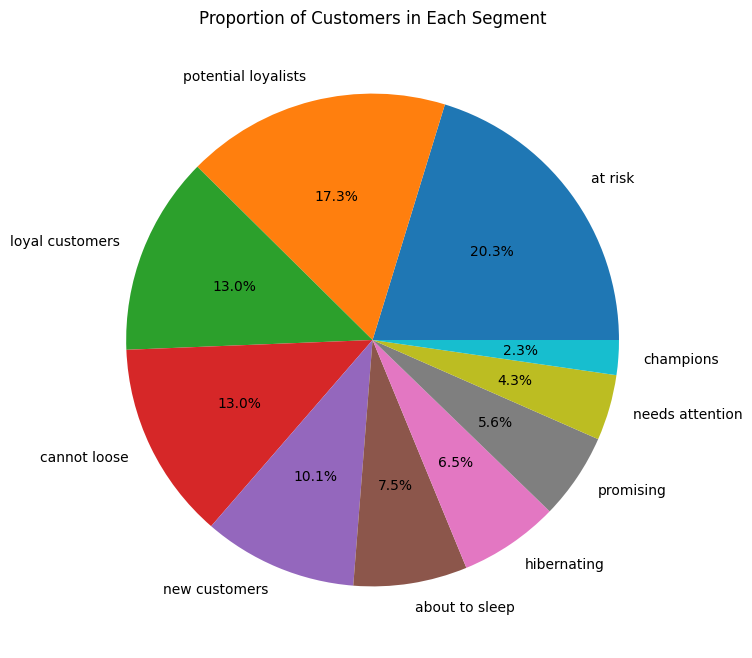

In [26]:

# Assuming `rfm` DataFrame contains a 'Segment' column with customer segmentation
# Calculate the proportion of customers in each segment
segment_proportions = rfm["Segment"].value_counts(normalize=True) * 100

# Pie chart for segment proportions
plt.figure(figsize=(8, 8))
segment_proportions.plot(kind="pie", autopct="%.1f%%")
plt.title("Proportion of Customers in Each Segment")
plt.ylabel("")  # Remove default ylabel for a cleaner pie chart
plt.show()


This bar chart highlights the median monetary value across RFM segments, showcasing the revenue potential of each group. Champions and Cannot Lose Them have the highest median values, emphasizing their critical role in driving revenue and the need for retention strategies like exclusive offers and loyalty programs. Loyal Customers also show significant monetary value, representing a stable and consistent revenue stream. Segments such as At Risk and Needs Attention indicate opportunities for re-engagement to recover their potential value. On the other hand, Hibernating, Promising, and New Customers have the lowest median values, requiring nurturing efforts to increase their spending and convert them into higher-value segments over time. This chart underscores the importance of focusing on high-value segments while strategically nurturing others for growth.

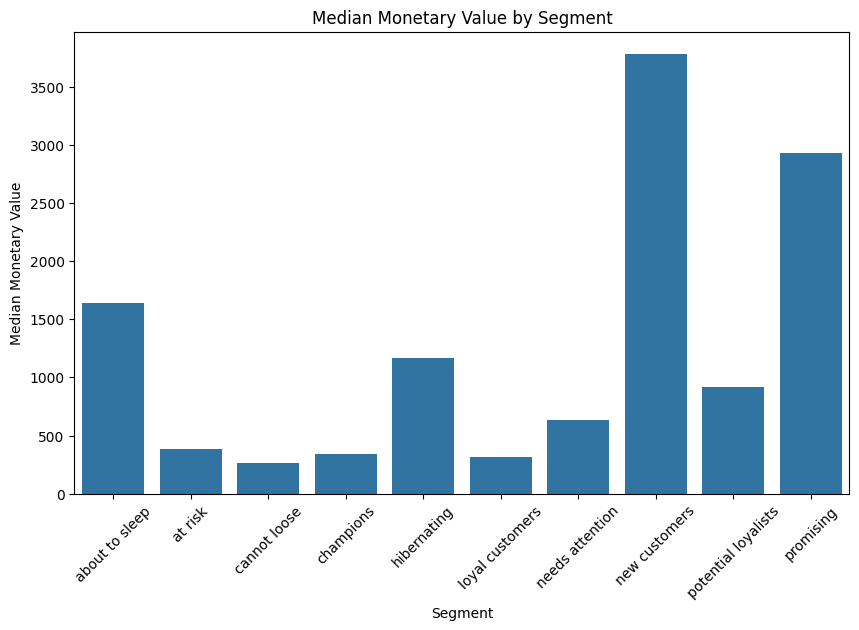

In [27]:
# Calculate median monetary value for each segment
segment_monetary = rfm.groupby("Segment")["Monetary"].median() 

# Bar plot for median monetary value by segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_monetary.index, y=segment_monetary.values, dodge=False)
plt.title('Median Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Median Monetary Value')
plt.xticks(rotation=45)
plt.show()


Champions have the highest median monetary value and the widest distribution, with high-value outliers contributing significantly to revenue, making them a priority for retention through strategies like VIP rewards, exclusive offers, and early product access. The "Cannot Lose Them" segment also shows high monetary values but slightly lower median and variability, highlighting the need for personalized win-back campaigns, such as loyalty bonuses, to prevent churn. Loyal customers provide stable, predictable revenue with a median value lower than Champions but higher than most segments, offering opportunities for upselling and cross-selling. In contrast, Hibernating and About to Sleep customers have the lowest monetary values, indicating disengagement, and can be targeted with low-cost re-engagement campaigns like discounts and seasonal promotions. Lastly, New and Promising customers, with low monetary values due to their early stage in the customer lifecycle, present potential for growth through onboarding, educational initiatives, and targeted promotions to build loyalty and increase their lifetime value.

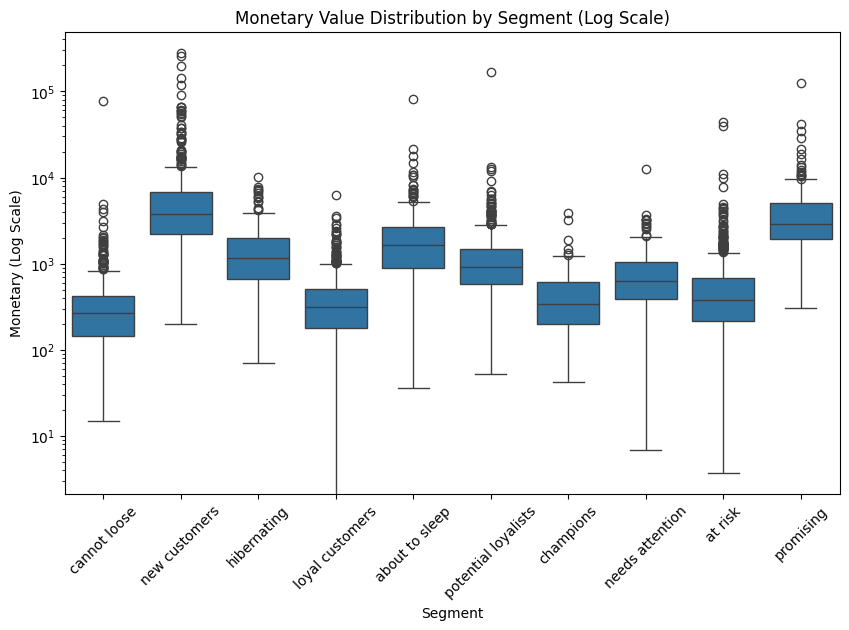

In [28]:
# Logarithmic scale for better visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm, x='Segment', y='Monetary')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Monetary Value Distribution by Segment (Log Scale)')
plt.xticks(rotation=45)
plt.ylabel('Monetary (Log Scale)')
plt.xlabel('Segment')
plt.show()



### **Customer Segment Characteristics and Strategies**

| **Segment**           | **Description**                                                                 | **Key Characteristics**                                                 | **Suggested Actions**                                                                                 |
|------------------------|---------------------------------------------------------------------------------|---------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Champions**          | High-value and highly engaged customers.                                       | Recent purchases, frequent buyers, high monetary value.                  | Retain with loyalty programs, exclusive rewards, and early product access.                           |
| **Loyal Customers**    | Regular and consistent buyers.                                                | Moderate recency, high frequency, good monetary value.                   | Upsell or cross-sell with personalized recommendations and reward programs.                          |
| **Potential Loyalists**| Customers with recent purchases and moderate frequency.                       | High recency, moderate frequency, growing monetary value.                | Nurture with targeted offers, personalized engagement, and incentives to increase loyalty.           |
| **New Customers**      | Recently acquired customers.                                                  | High recency, low frequency and monetary value.                          | Focus on onboarding, educational campaigns, and personalized product recommendations.                |
| **Promising**          | Customers showing initial interest.                                           | Moderately recent purchases, low frequency and monetary value.           | Encourage repeat purchases with tailored discounts and promotional campaigns.                        |
| **Needs Attention**    | Customers with moderate engagement but declining activity.                    | Moderate recency and frequency, moderate monetary value.                 | Re-engage with personalized offers and time-sensitive campaigns to boost activity.                   |
| **About to Sleep**     | Customers on the verge of becoming inactive.                                  | Low recency, low frequency, low monetary value.                          | Use re-engagement emails, "we miss you" campaigns, and small incentives to revive interest.          |
| **At Risk**            | Previously active customers who are disengaging.                              | Low recency, moderate frequency, moderate monetary value.                | Implement win-back strategies, personalized messages, and special offers to prevent churn.           |
| **Cannot Lose Them**   | High-value customers who are no longer engaging.                              | Low recency, high frequency, high monetary value.                        | Use premium win-back campaigns with significant incentives to recover their interest.                |
| **Hibernating**        | Disengaged customers with little to no activity.                              | Very low recency and frequency, low monetary value.                      | Low-cost reactivation campaigns like seasonal discounts or bulk promotional emails.                  |
